# Bootcamp Data Science y MLOps

<img src="https://i.ibb.co/5RM26Cw/LOGO-COLOR2.png" width="500px">

Creado en [escueladedatosvivos.ai](https://escueladedatosvivos.ai) 🚀.

¿Consultas? En la página tenés soporte por IA guiada, comunidad y el acceso a certificación.

<br>

---  

# 0) Dataset 🔧🚜

Nos basamos en el dataset de Kaggle: [Machine Predictive Maintenance Classification](https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification).

# 1) Cargamos los datos 📕

In [1]:
import pandas as pd
from funpymodeling.exploratory import status

In [2]:
# Para este caso nos interesa visualizar todas las columnas
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv("data/predictive_maintenance.csv", sep=',') 

In [4]:
data.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


*Nota:* si bien el valor defecto de sep en `read_csv` es la coma `,`. 
<br>Siempre lo hago explícito porque a veces los archivos vienen separados por punto y coma, u otro separador como tab. Es una buena práctica, y también aplica cuando graban archivos.

# 2) Preparación de la data 👀

In [5]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,UDI,0,0.0,0,0.0000,10000,int64
1,Product ID,0,0.0,0,0.0000,10000,object
2,Type,0,0.0,0,0.0000,3,object
3,Air temperature [K],0,0.0,0,0.0000,93,float64
4,Process temperature [K],0,0.0,0,0.0000,82,float64
5,Rotational speed [rpm],0,0.0,0,0.0000,941,int64
6,Torque [Nm],0,0.0,0,0.0000,577,float64
7,Tool wear [min],0,0.0,120,0.0120,246,int64
8,Target,0,0.0,9661,0.9661,2,int64
9,Failure Type,0,0.0,0,0.0000,6,object


Eliminar las columnas `UDI` y `Product ID`.
<br>La columna `Failure Type` es utilizada para clustering (no es nuestro caso).

In [6]:
data = data.drop(['UDI', 'Product ID', 'Failure Type'], axis=1)

Cambiar el nombre de las columnas para evitar espacios en blanco y que sean más concisas.

In [7]:
data.rename(
    columns = {
        'Air temperature [K]':'Air_temperature',
        'Process temperature [K]':'Process_temperature',
        'Rotational speed [rpm]':'Rotational_speed',
        'Torque [Nm]':'Torque',
        'Tool wear [min]':'Tool_wear',
        }, 
    inplace = True)

Visualizar data acondicionada y preparada:

In [8]:
data.head(5)

,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Target
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


In [9]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Type,0,0.0,0,0.0000,3,object
1,Air_temperature,0,0.0,0,0.0000,93,float64
2,Process_temperature,0,0.0,0,0.0000,82,float64
3,Rotational_speed,0,0.0,0,0.0000,941,int64
4,Torque,0,0.0,0,0.0000,577,float64
5,Tool_wear,0,0.0,120,0.0120,246,int64
6,Target,0,0.0,9661,0.9661,2,int64


In [10]:
data = pd.get_dummies(data)

In [11]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Air_temperature,0,0.0,0,0.0000,93,float64
1,Process_temperature,0,0.0,0,0.0000,82,float64
2,Rotational_speed,0,0.0,0,0.0000,941,int64
3,Torque,0,0.0,0,0.0000,577,float64
4,Tool_wear,0,0.0,120,0.0120,246,int64
5,Target,0,0.0,9661,0.9661,2,int64
6,Type_H,0,0.0,8997,0.8997,2,bool
7,Type_L,0,0.0,4000,0.4000,2,bool
8,Type_M,0,0.0,7003,0.7003,2,bool


Obtener valores límites: mín y máx para cada columna

In [12]:
# La .T es de Transpuesta
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Air_temperature,10000.0,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process_temperature,10000.0,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational_speed,10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque,10000.0,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool_wear,10000.0,107.95100,63.654147,0.0,53.0,108.0,162.0,253.0
Target,10000.0,0.03390,0.180981,0.0,0.0,0.0,0.0,1.0


# 3) Clasificación 🎯

## 3.1) Separación de X de Y, y luego TR de TS (rutina):

In [13]:
data_x = data.drop('Target', axis=1)
data_y = data['Target']

Nos quedamos solo con los valores del dataframe
<br>**Para la creación de la API si nos interesa el nombre de la columna, así que descartamos este paso.**

In [14]:
"""
data_x = data_x.values
data_y = data_y.values
"""

'\ndata_x = data_x.values\ndata_y = data_y.values\n'

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3)

## 3.2) Creación del modelo predictivo

In [16]:
from sklearn.ensemble import RandomForestClassifier 

# Creamos 500 decision trees
rf = RandomForestClassifier(n_estimators = 500, random_state = 42)

In [17]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

## 3.3) Predicción de la clase y score

In [18]:
rf.predict(x_train)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
pred_probs=rf.predict_proba(x_train)

In [20]:
pred_probs

array([[1.   , 0.   ],
       [0.998, 0.002],
       [1.   , 0.   ],
       ...,
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.998, 0.002]])

In [21]:
y_prob_tr=pred_probs[:,1]

In [22]:
y_prob_tr

array([0.   , 0.002, 0.   , ..., 0.   , 0.   , 0.002])

Lo que sigue:
    
- Matriz de confusión (MC) default (con sklearn)
- MC con crosstab
- Cambiar el punto de corte y graficar la MC
- Comparar antes y después de MC
- Función para "encontrar" punto de corte
- Curva ROC

## 3.4) Matriz de confusión

In [23]:
# atención, asume 0.5 como punto de corte
from sklearn.metrics import ConfusionMatrixDisplay

Sino se los toma, actualicen la librería: `!pip install --upgrade scikit-learn`

Vamos a usar directamente el que grafica porque incluye la matriz original

### a) Valores absolutos:

In [24]:
import seaborn as sns

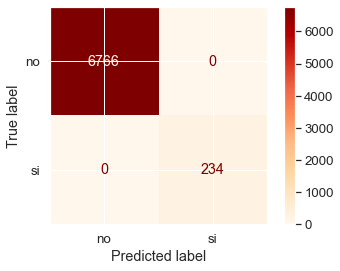

In [25]:
sns.set(font_scale=1.2) #  Ajuste tamaño de letra (var global)

ConfusionMatrixDisplay.from_estimator(
    rf, x_train, y_train,
    display_labels=['no','si'],
    cmap='OrRd',
    )

### b) Normalizando por fila:

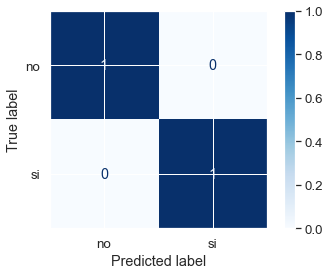

In [26]:
sns.set(font_scale=1.2) #  Ajuste tamaño de letra (var global)

ConfusionMatrixDisplay.from_estimator(
    rf, x_train, y_train,
    display_labels=['no','si'],
    cmap='Blues',
    normalize='true',
    )

### c) No permite variar el punto de corte, entonces:

<AxesSubplot:xlabel='Pred', ylabel='Actual'>

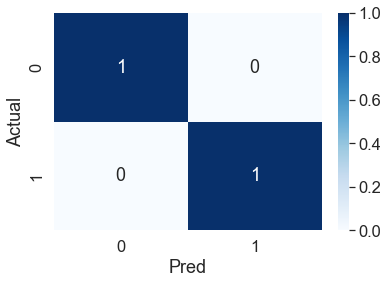

In [27]:
y_pred1=rf.predict(x_train)

sns.set(font_scale=1.5)                 # Ajuste tamaño de letra (var global)
conf_mat1=pd.crosstab(index=y_train,    # filas = valor real
                     columns=y_pred1,   # columnas = valor predicho
                     rownames=['Actual'], 
                     colnames=['Pred'], 
                     normalize='index')

sns.heatmap(conf_mat1, annot=True, cmap='Blues', fmt='g')

### d) Seteo del punto de corte

In [28]:
y_prob_tr

array([0.   , 0.002, 0.   , ..., 0.   , 0.   , 0.002])

### e) ¡Importante! Elección de un punto de corte

La primer opción es un punto que sea mayor al promedio.

In [29]:
y_prob_tr.mean()

0.032758857142857145

Creamos el label 🦾

In [30]:
import numpy as np

# Recuerden actualizar este valor 0.35 con el valor promedio que obtuvieron
np.where(y_prob_tr > 0.32, "si", "no")

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype='<U2')

Lo asignamos...

In [31]:
# Recuerden actualizar este valor 0.32 con el valor promedio que obtuvieron
y_pred2=np.where(y_prob_tr > 0.32, 1, 0)

In [32]:
y_pred2

array([0, 0, 0, ..., 0, 0, 0])

### f) Matriz de confusión (punto de corte custom)

<AxesSubplot:xlabel='Pred', ylabel='Actual'>

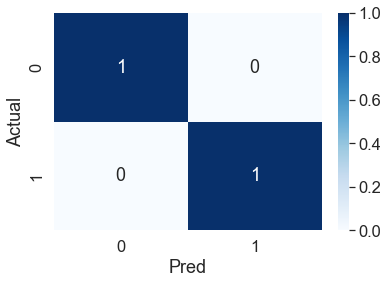

In [33]:
conf_mat2=pd.crosstab(index=y_train, 
                      columns=y_pred2,      # ¡cambio!
                      rownames=['Actual'], 
                      colnames=['Pred'], 
                      normalize='index')

sns.heatmap(conf_mat2, annot=True, cmap='Blues', fmt='g')

Comparando antes y después:

In [34]:
import matplotlib.pyplot as plt

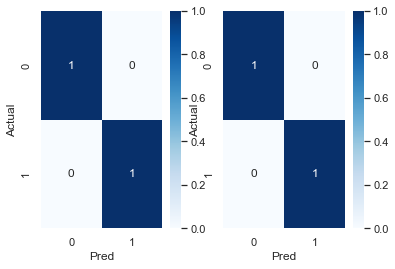

In [35]:
sns.set(font_scale=1)       # Ajuste tamaño de letra (var global)
fig, ax = plt.subplots(1,2)  

sns.heatmap(conf_mat1, annot=True, cmap='Blues', fmt='g', ax=ax[0])
sns.heatmap(conf_mat2, annot=True, cmap='Blues', fmt='g', ax=ax[1])

fig.show(warn=False)

### g) Análisis de los distintos puntos de corte

**Nota:** Nunca elegir el punto de corte con los datos de testing

In [36]:
#!pip3 install yellowbrick

Esta celda resuelve la tarea pero con muchos warnings ☢️
```
from yellowbrick.classifier.threshold import discrimination_threshold

dis_res=discrimination_threshold(rf, x_train, y_train,)
dis_res
```

👆 Así que la vamos a actualizar por esta celda:

**Nota:** Esta celda toma algunos minutos, mientras tanto espera el resultado con un café o mate 😎

C:\Users\Carlos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


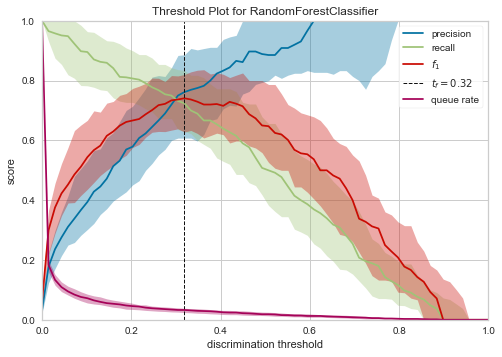

<AxesSubplot:title={'center':'Threshold Plot for RandomForestClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [37]:
from yellowbrick.classifier import DiscriminationThreshold

visualizer = DiscriminationThreshold(rf)

visualizer.fit(x_train, y_train)        # Ajustar data al visualizador
visualizer.show()                       # Mostrar figura

### h) Curva ROC

Graficamos para training y para test

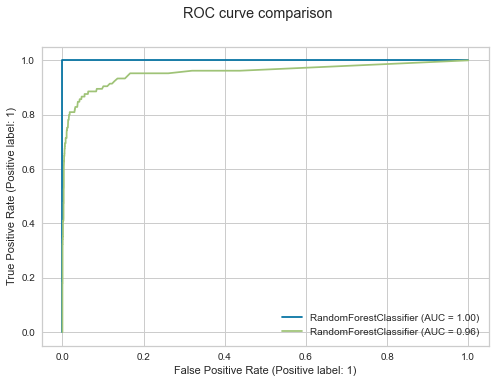

In [38]:
from sklearn.metrics import RocCurveDisplay

tr_disp = RocCurveDisplay.from_estimator(rf, x_train, y_train)
ts_disp = RocCurveDisplay.from_estimator(rf, x_test, y_test, ax=tr_disp.ax_)
ts_disp.figure_.suptitle("ROC curve comparison")

plt.show()

# 4) Guardar un modelo

Vamos a guardar el modelo de clasificación

In [39]:
import pickle

In [40]:
# Guardar en el disco
filename = 'model/rf.pkl'
pickle.dump(rf, open(filename, 'wb')) # rf = nuestro modelo

In [41]:
# Lo cargamos para usarlo en otro momento. 
rf_loaded = pickle.load(open(filename, 'rb'))

# 5) Guardar el nombre de las columnas

In [42]:
import pickle

# Guardamos las columnas x (sin Target)
with open('model/categories_ohe.pickle', 'wb') as handle:
    pickle.dump(data_x.columns, handle, protocol=pickle.HIGHEST_PROTOCOL)